**TELCO CLASSIFICATION MODELING**

    This is my working notebook where I will explore and create models. The most relavant information from here will be transfered to final_report.ipynb where I can more concisely explain my finding and give actionable data.

In [16]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import prepare
import acquire
import random
import scipy.stats as stats
from matplotlib import style
style.use('ggplot')
import itertools

**ACQUIRE/PREP.**

    It is worth noting that prepare.py relies on acquire.py to pull in the data which it preps. Also of note, prep removes 11 values in which have no total charges, these rows also have 0 tenure months. becuase the number of these rows is so small in comparison and they havent had a chance to churn. I feel comfortable removing them from the dataset.

In [2]:
# this function call acquires and preps in one motion, worth noting that 
# get_telco_data() is called within prep_telco() and will save a .csv of the 
# raw data
telco = prepare.prep_telco()
#look at the data
telco.head(3)

,is_female,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,1,0,1,1,9,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
1,0,0,0,0,9,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,0,0,0,0,4,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0


**EXPLORE**

    Below you will see some statistical analysis, some visualizations and correlation between churn and all features

In [3]:
# get basic info
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   is_female                               7032 non-null   int64  
 1   senior_citizen                          7032 non-null   int64  
 2   partner                                 7032 non-null   int64  
 3   dependents                              7032 non-null   int64  
 4   tenure                                  7032 non-null   int64  
 5   phone_service                           7032 non-null   int64  
 6   multiple_lines                          7032 non-null   int64  
 7   online_security                         7032 non-null   int64  
 8   online_backup                           7032 non-null   int64  
 9   device_protection                       7032 non-null   int64  
 10  tech_support                            7032 non-null   int6

In [4]:
telco.describe()

,is_female,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.495307,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,...,0.551052,0.209329,0.239619,0.343572,0.440273,0.216155,0.219283,0.216297,0.336320,0.228100
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,...,0.497422,0.406858,0.426881,0.474934,0.496455,0.411650,0.413790,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#quick glance at correlations 
abs(telco.corrwith(telco.churn)).sort_values(ascending=False)

churn                                     1.000000
contract_type_Month-to-month              0.404565
tenure                                    0.354049
internet_service_type_Fiber optic         0.307463
contract_type_Two year                    0.301552
payment_type_Electronic check             0.301455
internet_service_type_None                0.227578
autopay                                   0.210420
total_charges                             0.199484
monthly_charges                           0.192858
paperless_billing                         0.191454
contract_type_One year                    0.178225
online_security                           0.171270
tech_support                              0.164716
dependents                                0.163128
senior_citizen                            0.150541
partner                                   0.149982
payment_type_Credit card (automatic)      0.134687
internet_service_type_DSL                 0.124141
payment_type_Bank transfer (aut

**The top ten features correlated with churn are:**
1. contract_type_Month-to-month                  0.404565
2. tenure                                      0.354049
3. internet_service_type_Fiber optic           0.307463
4. contract_type_Two year                     0.301552
5. payment_type_Electronic check               0.301455
6. internet_service_type_None                  0.227578
7. autopay                                     0.210420
8. total_charges                                0.199484
9. monthly_charges                              0.192858
10. paperless_billing                            0.191454

I will look into a few of these with statistical analysis to test some hypotheses.

But first lets split the data to avoid potential overfitting and to reserve some data for validating and testing

In [6]:
# split the data into train test validate
x_train, y_train, x_validate, y_validate, x_test, y_test, train, validate, test= prepare.split_data(telco,"churn")
x_train.head(3)

,is_female,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
1947,1,0,1,1,37,1,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
6613,1,0,0,0,69,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
6256,1,0,0,0,72,1,1,0,1,1,...,0,0,1,0,1,0,1,0,0,0


Lets test this hypothesis

$H_0$ : There is no association between month to month contract and churn

$H_A$ : There is a association between month to month contract and churn

In [45]:
m_2_m_churn_cross = pd.crosstab(train['contract_type_Month-to-month'],train['churn'])
chi2, p, degf, expected = stats.chi2_contingency(m_2_m_churn_cross)
print('Observed')
print(m_2_m_churn_cross.values)
print('---\nExpected')
print(expected.astype(int))
print('---')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print('fail to reject null')


Observed
[[1642  114]
 [1249  932]]
---
Expected
[[1289  466]
 [1601  579]]
---
chi^2 = 653.0183
p     = 0.0000
fail to reject null


~~$H_0$ : There is no association between month to month contract and churn~~

**$H_A$ : There is an association between month to month contract and churn**

The p value is very low, assume a confidence interval of .95 or even .999, the p is so low its effectively zero, therefore the likelyhood of this correlation beign chance is null. 
There is a high level of certainty that the two are associated

In [24]:
# calc average churn for all of train
average_churn = train.churn
# calc average churn for subset with month to month contracts
month_to_month_churn = train[train['contract_type_Month-to-month']==1].churn
print(f'Average churn is: {average_churn.mean():.2f}\nMonth to month churn is {month_to_month_churn.mean():.2f}')

Average churn is: 0.27
Month to month churn is 0.43


And now this one

$H_0$ : There is not a linear correlation between monthly charges and churn

$H_A$ : There is a linear correlation between monthly charges and churn

<AxesSubplot:xlabel='monthly_charges', ylabel='churn'>

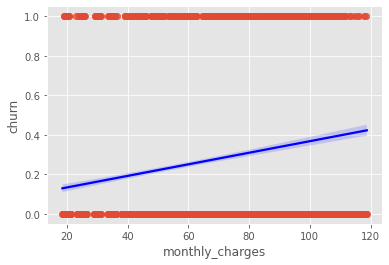

In [46]:
p = sns.regplot(data = train, x = 'monthly_charges', y = 'churn', line_kws={"color": "blue"})
p.set(title='Monthly Charges vs. Churn')

In [50]:
r, p = stats.pearsonr(train.monthly_charges, train.churn)
r, p/2
# $H_0$ : There is not a linear correlation between monthly charges and churn
# $H_A$ : There is a linear correlation between monthly charges and churn
# There is a linear correlation between monthly charges and churn

(0.19783208219099263, 2.457056647107511e-36)

~~$H_0$ : There is not a linear correlation between monthly charges and churn~~

**$H_A$ : There is a linear correlation between monthly charges and churn**

In other words, those with higher monthly charges are more likely to churn

[Text(0.5, 1.0, 'Tenure vs. Churn')]

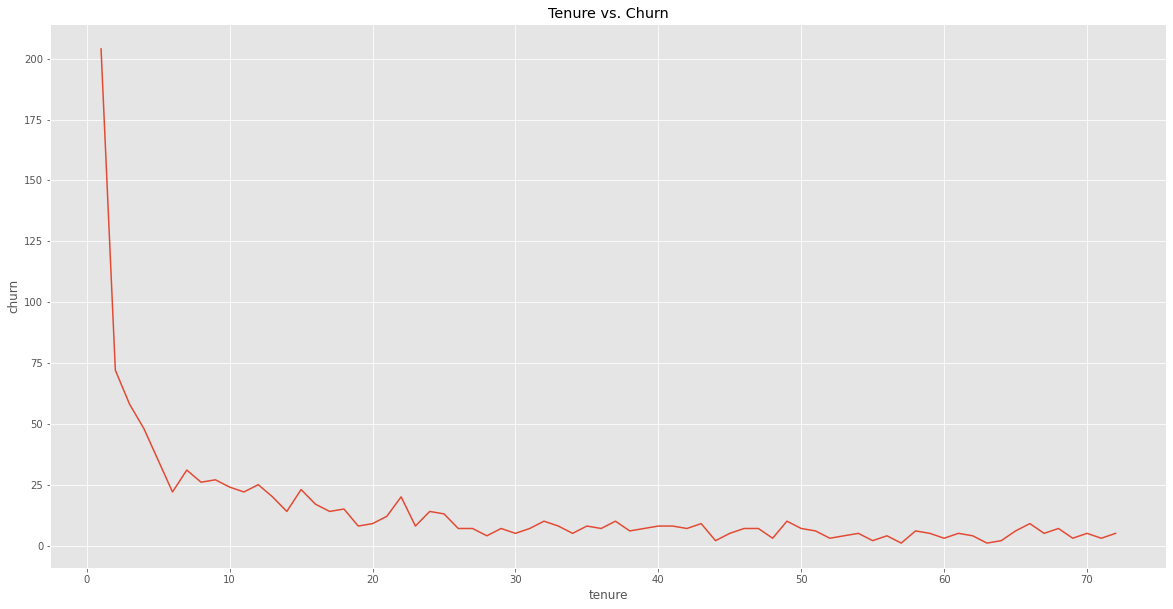

In [144]:
plt.figure(figsize=[20,10])
subset =train[['churn','tenure']].groupby(['tenure']).sum().reset_index()
#y = train[['churn','tenure']].groupby(['tenure']).sum().index.tolist()
p = sns.lineplot(data= subset, x = 'tenure', y = 'churn')
p.set(title='Tenure vs. Churn')

[Text(0.5, 1.0, 'Tenure vs. autopay')]

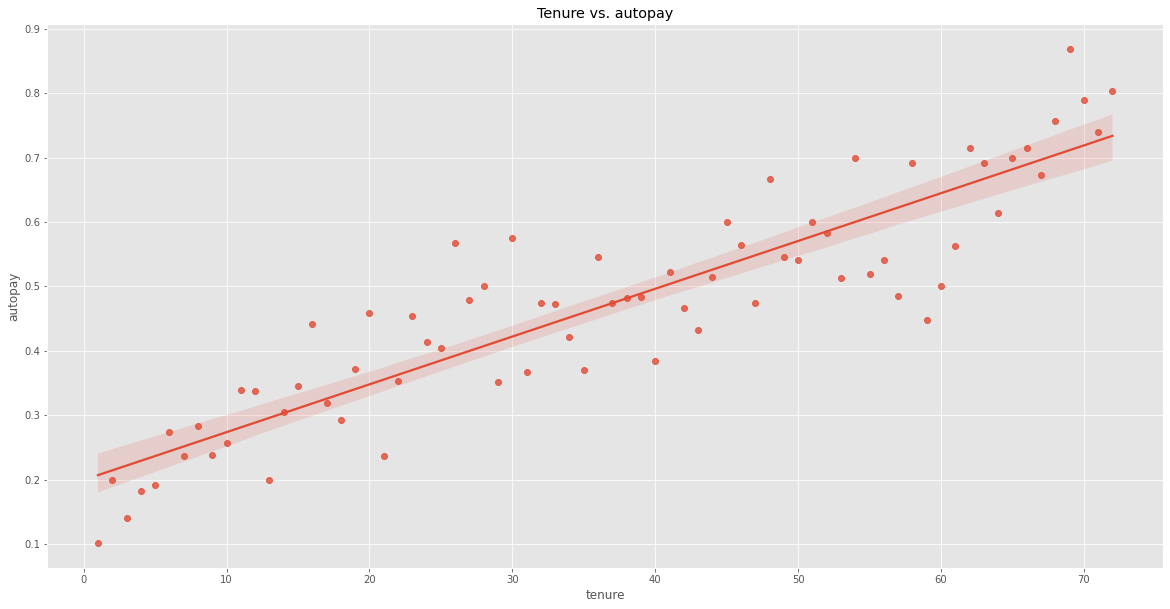

In [145]:
plt.figure(figsize=[20,10])
subset =train[['autopay','tenure']].groupby(['tenure']).mean().reset_index()
p = sns.regplot(data= subset, x = 'tenure', y = 'autopay')
p.set(title='Tenure vs. autopay')

[Text(0.5, 1.0, 'Tenure vs. autopay')]

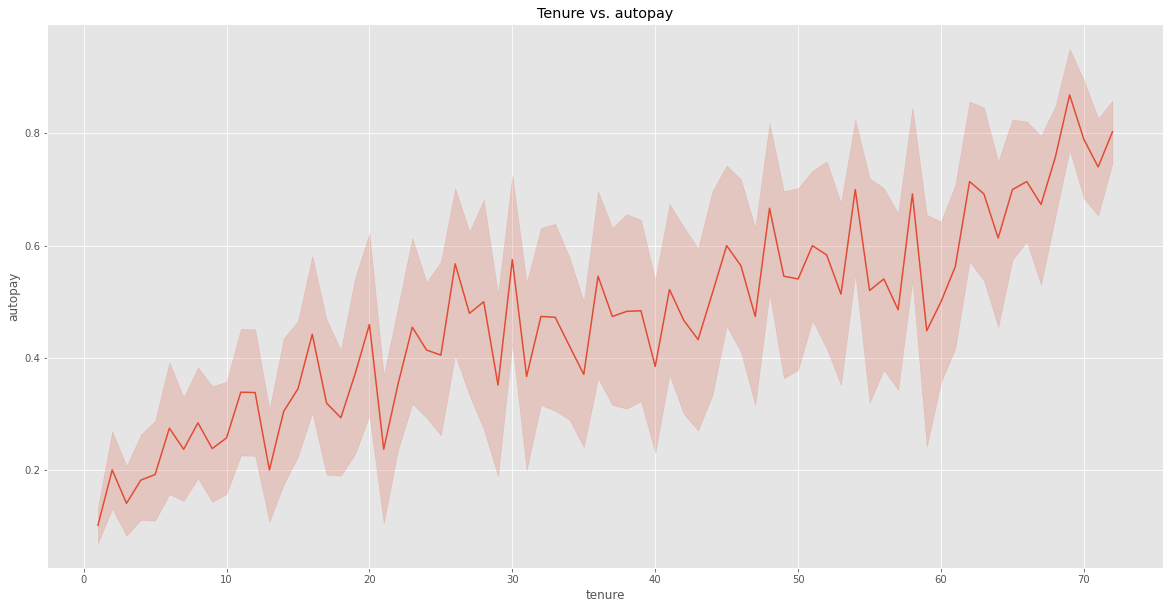

In [142]:
plt.figure(figsize=[20,10])
p= sns.lineplot(data=train, y = train.autopay, x = 'tenure')
p.set(title='Tenure vs. autopay')

[Text(0.5, 1.0, 'Monthly Charges vs. churn')]

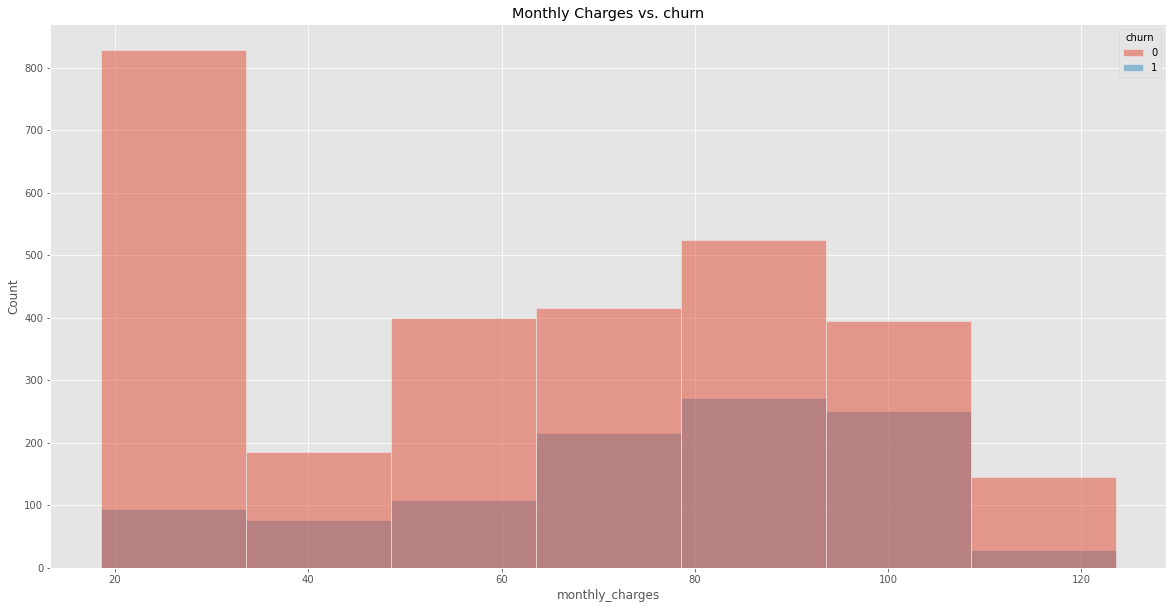

In [157]:
plt.figure(figsize=[20,10])
p= sns.histplot(data=train, x = train.monthly_charges, hue="churn", binwidth=15)
p.set(title='Monthly Charges vs. churn')

Text(0, 0.5, 'Percent Churned')

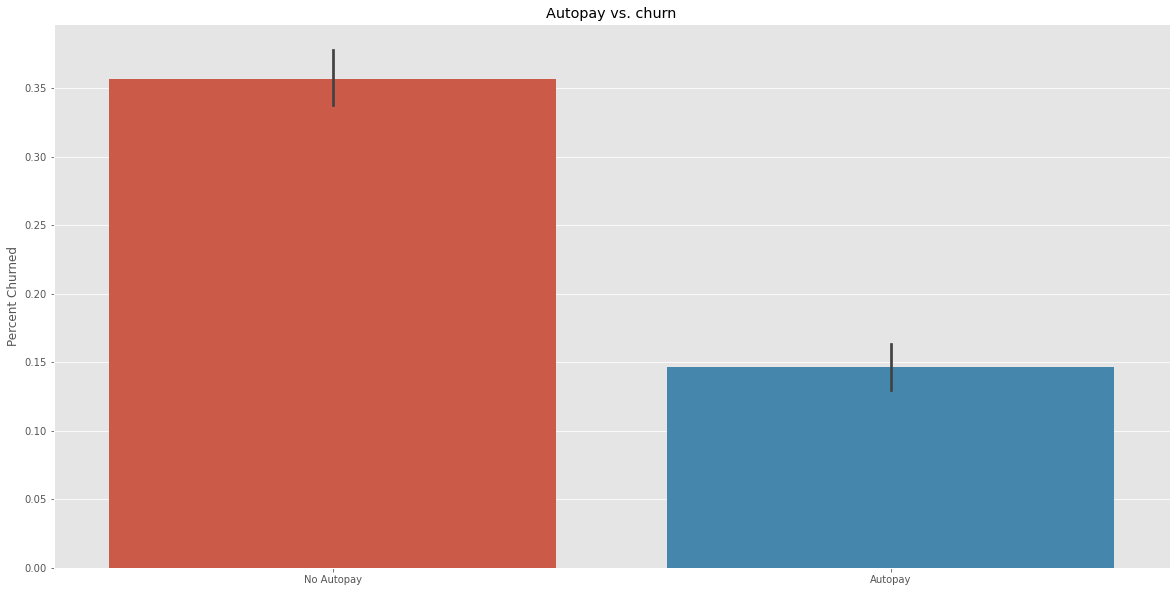

In [161]:
plt.figure(figsize=[20,10])
p= sns.barplot(data=train, y = train.churn, x = 'autopay')
p.set(title='Autopay vs. churn')
p.set_xticklabels(['No Autopay','Autopay'])
p.set_xlabel('')
p.set_ylabel('Percent Churned')

**MODELING**

    Here I will make some different types of models using the training dataset before evaluating them against each other using the validate dataset

In [162]:
# lets establish a baseline to see if the model is even worth explore
# the mode is the most common value, in this case we will see if its churn(1) or no churn(0)
baseline = y_train.mode().values[0]
baseline
#no churn is mode

0

In [163]:
# if we estimate everyone to not churn, we get the below accuracy
# therefore we should look for models with a better accuracy 0.73,
# it is also worth noting that accuracy is the goal versus precision or recall.
# We will not use precision becuase it doesnt factor negative cases
# we will not use recall for the similar reason, we dont want to put too much 
# emphasis on people who wont churn, nor on people who will churn
baseline_accuracy = (y_train == baseline).mean()
print( f'baseline_accuracy accuracy using mode is: {baseline_accuracy:.02f}')

baseline_accuracy accuracy using mode is: 0.73


**Lets try decision tree modeling**

In [165]:
# First I will try some decision trees
# decision tree with max depth 1
model1 = DecisionTreeClassifier(max_depth=1, random_state= 42)
# fit the model with all possible feature
model1 = model1.fit(x_train,y_train)
# make predictions
model1_predictions = model1.predict(x_train)
# get the score
model1.score(x_train,y_train)
# accuracy is near baseline, therefore not very helpful

0.7343154686309372

In [167]:
# decision tree with no max depth
model2 = DecisionTreeClassifier(random_state= 42)
# fit the model with all possible feature
model2 = model1.fit(x_train,y_train)
# make predictions
model2_predictions = model1.predict(x_train)
# get the score
model2.score(x_train,y_train)
# accuracy is near perfect, but we will probably see this is a result of overfitting

0.9984759969519938

In [173]:
# lets try a few more decision tree models adjusting depth and eval them on validate
results = pd.DataFrame()
# for depth from 1 to 20
for depth in range(1,21):
    #build
    model = DecisionTreeClassifier(max_depth=depth,random_state=42)
    #fit
    model = model.fit(x_train, y_train)
    #eval
    train_accuracy = model.score(x_train,y_train)
    y_predictions = model.predict(x_train)
    train_f1_score = f1_score(y_train,model.predict(x_train),pos_label=0)
    validate_accuracy = model.score(x_validate,y_validate)
    validate_f1_score = f1_score(y_validate,model.predict(x_validate),pos_label=0)
    delta_train_validate = abs(train_accuracy-validate_accuracy)
    #build df
    stats = pd.Series({"max_depth": depth,
        "train_accuracy": train_accuracy,
        "train_f1_score": train_f1_score,
        "validate_accuracy": validate_accuracy,
        "validate_f1_score": validate_f1_score,
        "accuracy_difference":delta_train_validate})
    results = pd.concat([results,stats],axis =1)
# transpose and reset the index to make it cleaner
results = results.T.reset_index(drop=True)
# view the results
results

,max_depth,train_accuracy,train_f1_score,validate_accuracy,validate_f1_score,accuracy_difference
0,1.0,0.734315,0.846807,0.734005,0.846601,0.000311
1,2.0,0.764288,0.834934,0.768365,0.839557,0.004077
2,3.0,0.795022,0.869481,0.780806,0.861837,0.014216
3,4.0,0.795276,0.863805,0.779621,0.855478,0.015655
4,5.0,0.808230,0.873978,0.784360,0.860750,0.023869
5,6.0,0.818644,0.875175,0.773697,0.845968,0.044947
6,7.0,0.832360,0.887449,0.774882,0.851097,0.057478
7,8.0,0.849378,0.898162,0.772512,0.847981,0.076866
8,9.0,0.867412,0.910371,0.767773,0.844937,0.099639
9,10.0,0.887732,0.923872,0.752370,0.834652,0.135362


In [176]:
# lets try a few more decision tree models adjusting depth and eval them on validate
results = pd.DataFrame()
# for depth from 1 to 20
for depth in range(1,21):
    # try different numbers of features 1-20
    for feature_count in range(1,21):
        #build
        model = DecisionTreeClassifier(max_depth=depth,random_state=42, max_features = feature_count)
        #fit
        model = model.fit(x_train, y_train)
        #eval
        train_accuracy = model.score(x_train,y_train)
        y_predictions = model.predict(x_train)
        train_f1_score = f1_score(y_train,model.predict(x_train),pos_label=0)
        validate_accuracy = model.score(x_validate,y_validate)
        validate_f1_score = f1_score(y_validate,model.predict(x_validate),pos_label=0)
        delta_train_validate = abs(train_accuracy-validate_accuracy)
        #build df
        stats = pd.Series({"max_depth": depth,
            "max features": feature_count,
            "train_accuracy": train_accuracy,
            "train_f1_score": train_f1_score,
            "validate_accuracy": validate_accuracy,
            "validate_f1_score": validate_f1_score,
            "accuracy_difference":delta_train_validate})
        results = pd.concat([results,stats],axis =1)
# transpose and reset the index to make it cleaner
results = results.T.reset_index(drop=True)

In [198]:
# results are now very large and hard to interpret
# so we will select a few spefically
# top three by train_accuracy
results.iloc[results.train_accuracy.nlargest(n=3).index]
# although they are accurate on train, they are not on validate and likely not to accurate on test
# very likely to be overfitting


,max_depth,max features,train_accuracy,train_f1_score,validate_accuracy,validate_f1_score,accuracy_difference
398,20.0,19.0,0.997968,0.998618,0.714455,0.804383,0.283513
397,20.0,18.0,0.997206,0.998099,0.715047,0.804392,0.282159
395,20.0,16.0,0.996952,0.997926,0.734005,0.819751,0.262947


In [199]:
# top three by validate_accuracy
results.iloc[results.validate_accuracy.nlargest(n=3).index]
# decent accuracy on validate, a few points higher than baseline


,max_depth,max features,train_accuracy,train_f1_score,validate_accuracy,validate_f1_score,accuracy_difference
118,6.0,19.0,0.814834,0.875957,0.787915,0.860483,0.026919
129,7.0,10.0,0.804928,0.865969,0.787322,0.856801,0.017605
76,4.0,17.0,0.797054,0.858759,0.784953,0.852738,0.012101


In [196]:
# top three by validate_f1_score
results.iloc[results.validate_f1_score.nlargest(n=3).index]
# good f1 scores and decent accuracy as well

,max_depth,max features,train_accuracy,train_f1_score,validate_accuracy,validate_f1_score,accuracy_difference
68,4.0,9.0,0.793498,0.868765,0.781398,0.862467,0.012099
53,3.0,14.0,0.792482,0.869842,0.778436,0.861891,0.014046
72,4.0,13.0,0.795276,0.869621,0.780806,0.861837,0.014470


**Lets try random forest modeling**

In [201]:
# jump right into a large sample size
results = pd.DataFrame()
# for depth from 1 to 20
for depth in range(1,21):
    # try different number of min samples per leaf
    for min_sample_leaf in range(1,5):
        #build
        model = RandomForestClassifier(random_state=42, min_samples_leaf= min_sample_leaf, max_depth=depth)
        #fit
        model = model.fit(x_train, y_train)
        #eval
        train_accuracy = model.score(x_train,y_train)
        y_predictions = model.predict(x_train)
        train_f1_score = f1_score(y_train,model.predict(x_train),pos_label=0)
        validate_accuracy = model.score(x_validate,y_validate)
        validate_f1_score = f1_score(y_validate,model.predict(x_validate),pos_label=0)
        delta_train_validate = abs(train_accuracy-validate_accuracy)
        #build df
        stats = pd.Series({"max_depth": depth,
            "min_samples_leaf": min_sample_leaf,
            "train_accuracy": train_accuracy,
            "train_f1_score": train_f1_score,
            "validate_accuracy": validate_accuracy,
            "validate_f1_score": validate_f1_score,
            "accuracy_difference":delta_train_validate})
        results = pd.concat([results,stats],axis =1)
# transpose and reset the index to make it cleaner
results = results.T.reset_index(drop=True)


In [202]:
# same as before
# results are now very large and hard to interpret
# so we will select a few spefically
# top three by train_accuracy
results.iloc[results.train_accuracy.nlargest(n=3).index]
# although they are accurate on train, they are not on validate and likely not to accurate on test
# very likely to be overfitting

,max_depth,min_samples_leaf,train_accuracy,train_f1_score,validate_accuracy,validate_f1_score,accuracy_difference
76,20.0,1.0,0.997968,0.998617,0.784953,0.859900,0.213015
72,19.0,1.0,0.997714,0.998444,0.778436,0.855151,0.219278
68,18.0,1.0,0.997460,0.998270,0.781398,0.857364,0.216062


In [203]:
# top three by validate_accuracy
results.iloc[results.validate_accuracy.nlargest(n=3).index]
# decent accuracy on validate, a few points higher than baseline

,max_depth,min_samples_leaf,train_accuracy,train_f1_score,validate_accuracy,validate_f1_score,accuracy_difference
36,10.0,1.0,0.897130,0.931414,0.799763,0.869498,0.097367
51,13.0,4.0,0.873254,0.916429,0.799171,0.869162,0.074083
55,14.0,4.0,0.876556,0.918566,0.799171,0.869465,0.077385


In [204]:
# top three by validate_f1_score
results.iloc[results.validate_f1_score.nlargest(n=3).index]
# good f1 scores and decent accuracy as well

,max_depth,min_samples_leaf,train_accuracy,train_f1_score,validate_accuracy,validate_f1_score,accuracy_difference
20,6.0,1.0,0.820930,0.883375,0.797986,0.869499,0.022944
36,10.0,1.0,0.897130,0.931414,0.799763,0.869498,0.097367
55,14.0,4.0,0.876556,0.918566,0.799171,0.869465,0.077385


Just like a forest provides more oxygen than a single tree, a random forest provides more accuracy than a single decision tree. Downside for random forest models is the difficulty to explain. We will keep theses models for later.

**Lets try Logistic Regression modeling**

In [229]:
# my feature list is really long
len(train.columns) #results 28
# 28 features, so I will cut them down by correlation and then iterate them
# here I get the top 15
top_features = abs(train.corrwith(train.churn)).sort_values(ascending=False).nlargest(n=10).index.tolist()
# this includes churn, so we will drop it
top_features.remove('churn')
# now we have a more manageable list of 9 features
top_features

['contract_type_Month-to-month',
 'tenure',
 'payment_type_Electronic check',
 'internet_service_type_Fiber optic',
 'contract_type_Two year',
 'autopay',
 'internet_service_type_None',
 'total_charges',
 'monthly_charges']

In [266]:
# jump right into a large sample size
results = pd.DataFrame()
# change the c
c_list=[0.1,1,10]
# lets track top features by making an empty array and dummy score
# each model will compare to current best and set itself as best if higher
best_features =[]
best_score = 0
#make a list of all combinations of features
combinations = []
for i in range(1, len(top_features)+1):
    combinations.extend(list(itertools.combinations(top_features,i)))
#iterate between 1 and all top features
for combination in combinations:
    #adjust the c
    for c in c_list:
        #build
        model = LogisticRegression(random_state=42,C=c)
        #convert list to array to pass into function
        features = np.array(combination)
        #fit on the combination determined above
        model.fit(x_train[features], y_train)
        #eval
        train_accuracy = model.score(x_train[features],y_train)
        train_f1_score = f1_score(y_train,model.predict(x_train[features]),pos_label=0)
        validate_accuracy = model.score(x_validate[features],y_validate)
        validate_f1_score = f1_score(y_validate,model.predict(x_validate[features]),pos_label=0)
        delta_train_validate = abs(train_accuracy-validate_accuracy)
        #build df
        stats = pd.Series({"c": c,
            "number_features": len(features),
            "train_accuracy": train_accuracy,
            "train_f1_score": train_f1_score,
            "validate_accuracy": validate_accuracy,
            "validate_f1_score": validate_f1_score,
            "accuracy_difference":delta_train_validate})
        results = pd.concat([results,stats],axis =1)
        # this could be done in the df but its a large output, array of up to len(best_features) strings
        # strings could be converted to index values to be more concise
        if validate_accuracy > best_score:
            #reset best
            best_score = validate_accuracy
            #save best features
            best_features = features

# transpose and reset the index to make it cleaner
results = results.T.reset_index(drop=True)

In [268]:
features

array(['contract_type_Month-to-month', 'tenure',
       'payment_type_Electronic check',
       'internet_service_type_Fiber optic', 'contract_type_Two year',
       'autopay', 'internet_service_type_None', 'total_charges',
       'monthly_charges'], dtype='<U33')

In [245]:
# top three by validate_accuracy
results.iloc[results.validate_accuracy.nlargest(n=1, keep='all').index]
# decent accuracy on validate, a few points higher than baseline

,c,number_features,train_accuracy,train_f1_score,validate_accuracy,validate_f1_score,accuracy_difference
998,10.0,5.0,0.804928,0.872340,0.792062,0.865774,0.012866
1329,0.1,6.0,0.803912,0.871973,0.792062,0.866082,0.011850
1330,1.0,6.0,0.805690,0.872818,0.792062,0.865877,0.013628
1339,1.0,6.0,0.805436,0.872757,0.792062,0.865877,0.013374


In [269]:
# lets limit our model to one feature
results = pd.DataFrame()
# change the c
c_list=[.01,.1,1,10,100]
# lets go through each feature individually
for feature in x_train.columns:
    print(feature)
    #adjust the c
    for c in c_list:
        #build
        model = LogisticRegression(random_state=42,C=c)
        #fit to the feature determined above
        feature = np.array(feature)
        model.fit(x_train['is_female'], y_train)
        #eval
        train_accuracy = model.score(x_train[feature],y_train)
        train_f1_score = f1_score(y_train,model.predict(x_train[feature]),pos_label=0)
        validate_accuracy = model.score(x_validate[feature],y_validate)
        validate_f1_score = f1_score(y_validate,model.predict(x_validate[feature]),pos_label=0)
        delta_train_validate = abs(train_accuracy-validate_accuracy)
        #build df
        stats = pd.Series({"c": c,
            "feature": feature,
            "train_accuracy": train_accuracy,
            "train_f1_score": train_f1_score,
            "validate_accuracy": validate_accuracy,
            "validate_f1_score": validate_f1_score,
            "accuracy_difference":delta_train_validate})
        results = pd.concat([results,stats],axis =1)

# transpose and reset the index to make it cleaner
results = results.T.reset_index(drop=True)

is_female


ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 1. ... 0. 1. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [259]:
test = np.array(feature).reshape(-1,1)


AttributeError: 'numpy.ndarray' object has no attribute 'values'